In [ ]:
import os
import sys
sys.path.append("..")

from src.eval.SampleResult import SampleResult
from src.eval.utils.draw_alignments import draw

In [3]:
RESULTS_05_05 = "../out/2025-05-05_13-29-23_librispeech-pc-test-clean_large-v3-turbo"
RESULTS_05_02 = "../out/2025-05-02_10-50-33_librispeech-pc-test-clean_large-v3-turbo"
RESULTS_ASSEMBLY = "../out/assemblyai"
RESULTS_ASSEMBLY_OFFSET = "../out/assemblyai_start_offset"
RESULTS_ASSEMBLY_SLOW = "../out/assemblyai_slow_send"

In [4]:
RESULTS = RESULTS_05_05

In [5]:
files = os.listdir(RESULTS)
files = [f for f in files if f.endswith("final.json")]

# get ids from the first part of the filename separated by "_"
file_ids = [f.split("_")[0] for f in files]

samples = [SampleResult.load_by_id(RESULTS, file_id) for file_id in file_ids]

/home/niko/Code/streaming-asr-evaluation/notebooks/../src/eval/SampleResult.py:158: UserWarning: Final MFA file not found: ../out/2025-05-05_13-29-23_librispeech-pc-test-clean_large-v3-turbo/mfa/7127-75947-0000/7127-75947-0000.TextGrid
  warnings.warn(f"Final MFA file not found: {final_mfa_path}")
/home/niko/Code/streaming-asr-evaluation/notebooks/../src/eval/SampleResult.py:158: UserWarning: Final MFA file not found: ../out/2025-05-05_13-29-23_librispeech-pc-test-clean_large-v3-turbo/mfa/3575-170457-0000/3575-170457-0000.TextGrid
  warnings.warn(f"Final MFA file not found: {final_mfa_path}")


In [6]:
print("Number of samples:", len(samples))

Number of samples: 83


In [12]:
for sample in samples:
    sample.build_alignments(align_to="baseline", temporal_tolerance=0.5)

In [13]:
s = next((s for s in samples if s.sample_id == "121-121726-0000"), None)

In [14]:
for p in s.partials:
    if p.window[1] == 0.0:
        p.window = (0.0, p.observation_time)

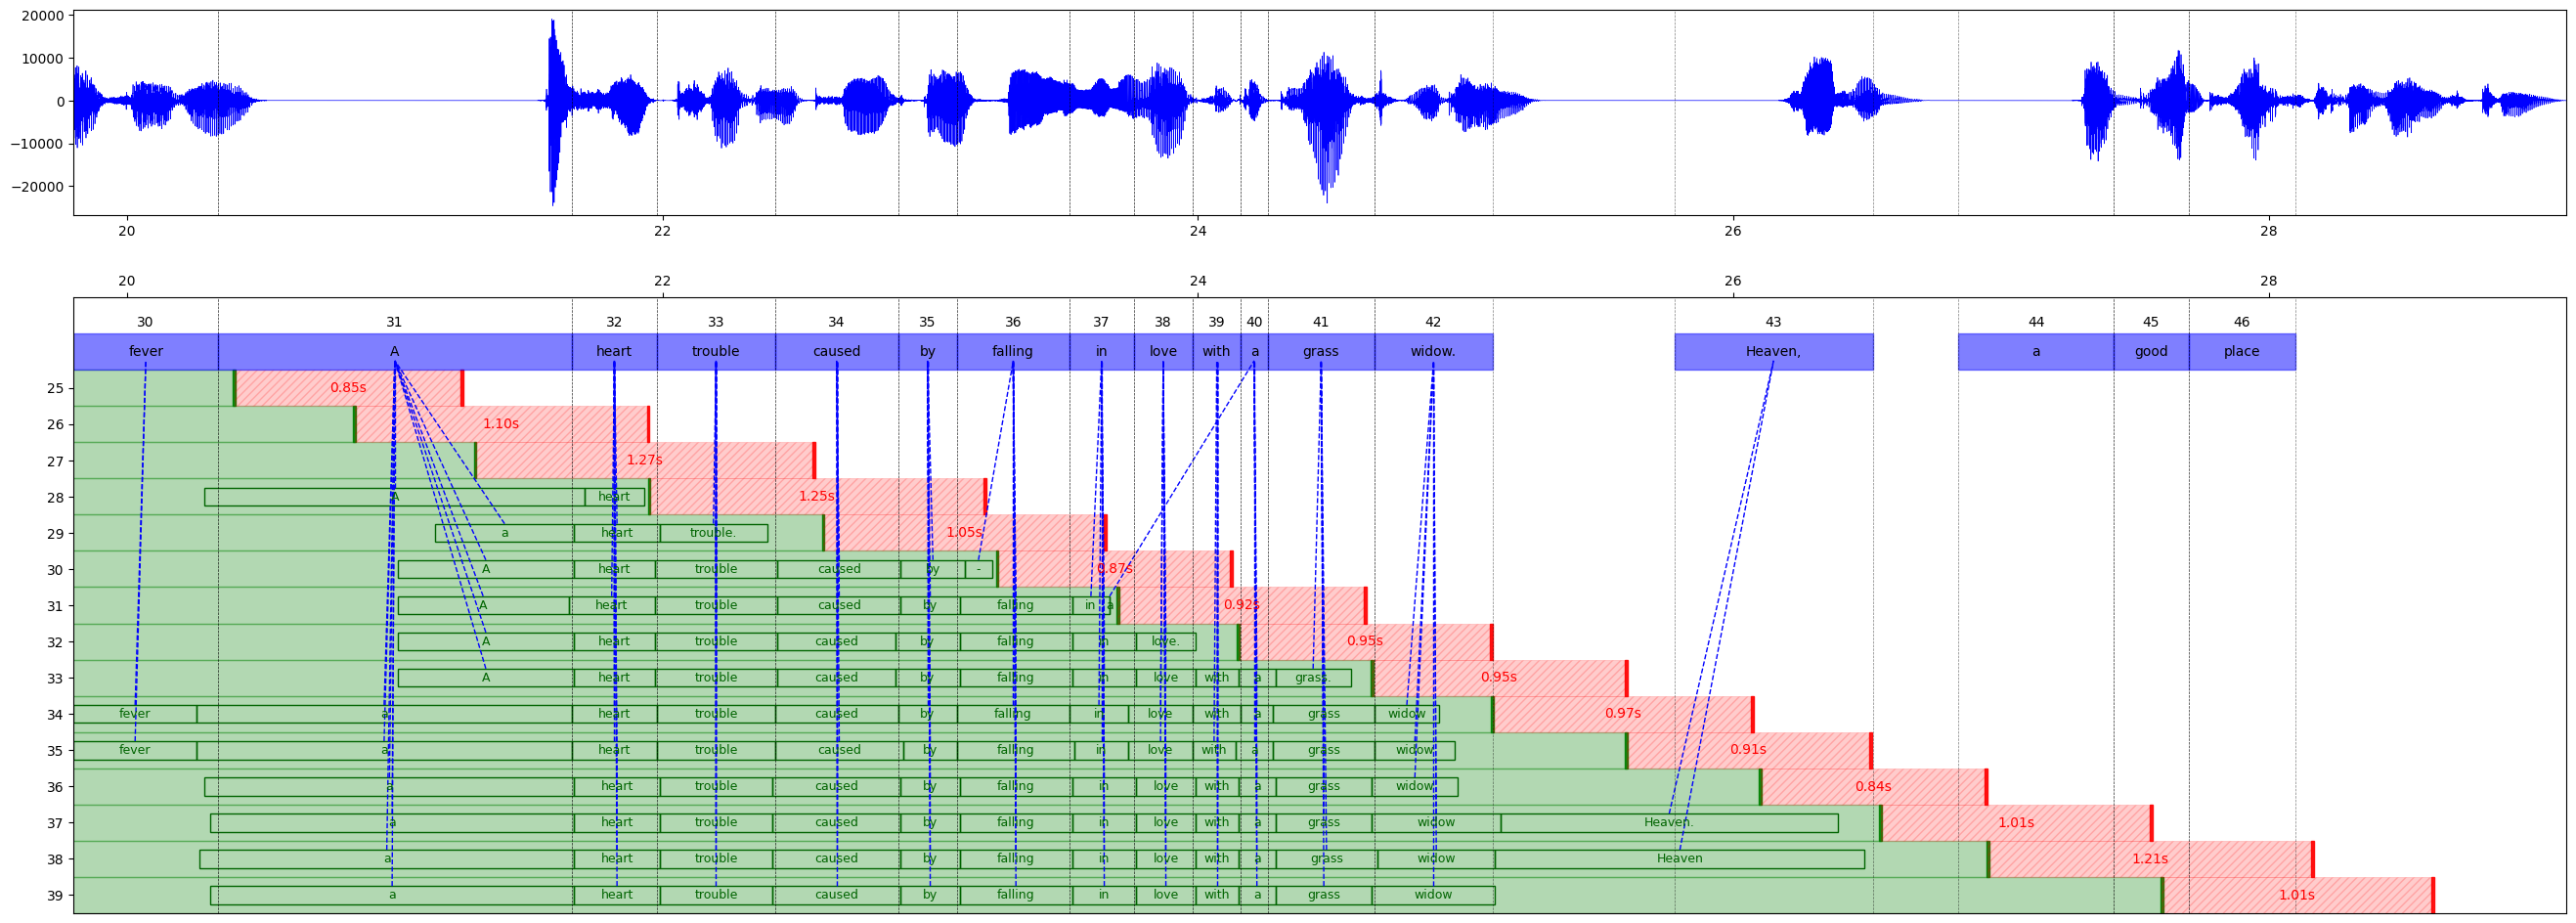

In [15]:
start_t, end_t = draw(s, 30, 17, wave=True, alignment="confirmed")